In [18]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import numpy as np

In [2]:
df = pd.read_csv('players.csv')

C:\Users\bogoj\AppData\Local\Temp\ipykernel_14140\3006090364.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('players.csv')


In [3]:
df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [4]:
X,y = make_blobs(n_samples=150,n_features=2,centers=10,cluster_std=0.5,shuffle=True,random_state=0)

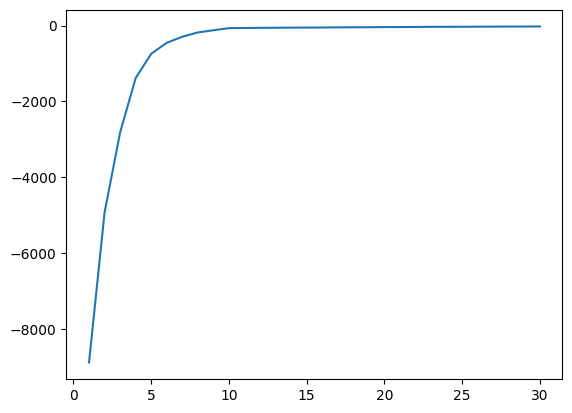

In [8]:
results = []
for k in range(1, 31):
    km = KMeans(n_clusters=k,n_init=10).fit(X)
    results.append(km.score(X))
    
plt.plot(range(1, 31) ,results)

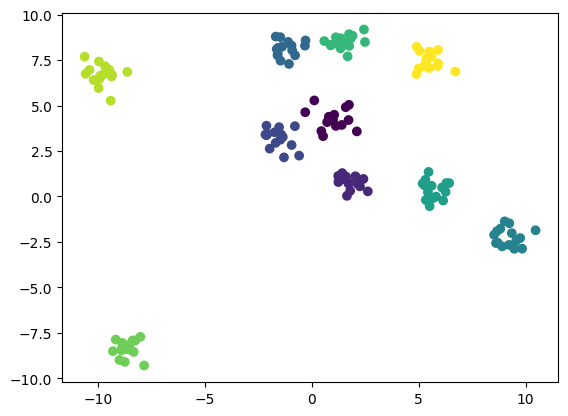

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

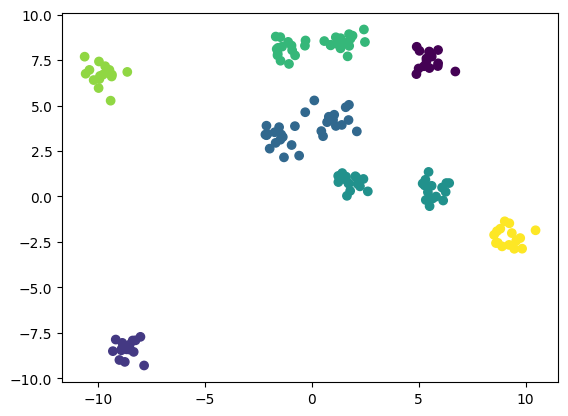

In [10]:
km = KMeans(n_clusters=7,n_init=10).fit(X)
y2 = km.labels_
plt.scatter(X[:, 0], X[:, 1], c=y2, cmap='viridis')

In [23]:
def recursive_clustering(X):
    km = KMeans(n_clusters=2,n_init=10).fit(X)
    X0 = [x for x, y in zip(X, km.labels_) if y == 0]
    X1 = [x for x, y in zip(X, km.labels_) if y == 1]
    
    dist0 = [np.linalg.norm(x - km.cluster_centers_[0]) for x in X0]
    dist1 = [np.linalg.norm(x - km.cluster_centers_[1]) for x in X1]
    
    centers = []
    stat, p = shapiro(dist0)
    if p > 0.05:
        centers.append(km.cluster_centers_[0])
    else:
        centers += (recursive_clustering(X0))
    stat, p = shapiro(dist1)
    if p > 0.05:
        centers.append(km.cluster_centers_[1])
    else:
        centers += (recursive_clustering(X1))
    return centers
    

In [24]:
centers = recursive_clustering(X)

In [25]:
centers

[array([ 9.20979187, -2.23316647]),
 array([3.78160634, 0.57356631]),
 array([3.50257588, 7.99964443]),
 array([-0.57892311,  5.18790972]),
 array([-9.20739879, -0.84035132])]

In [28]:
km = KMeans(n_clusters=len(centers), n_init=10).fit(centers)

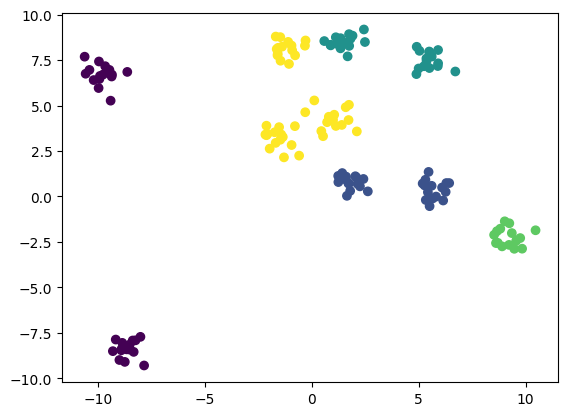

In [30]:
y3 = km.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y3, cmap='viridis')